<a href="https://colab.research.google.com/github/wokwipradeep/matty/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***pytorch clasigication***

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
len(x),len(y)

(1000, 1000)

In [3]:
print(f"first sample of x {x[:5]}")
print(f"first sample of y {y[:5]}")

first sample of x [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first sample of y [1 1 1 1 0]


In [4]:
import pandas as pd
circles = pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


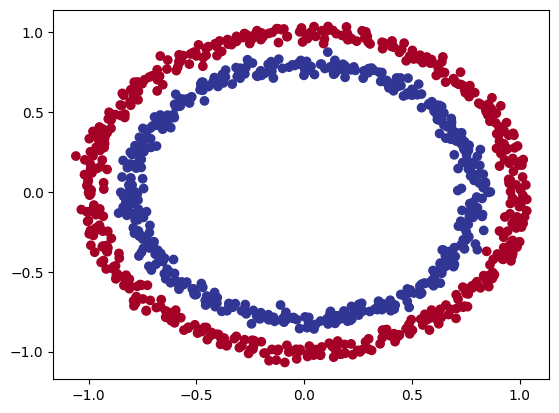

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [6]:
x.shape, y.shape

((1000, 2), (1000,))

In [7]:
print(f"values for one sample of X: {x[0]} and same for y : {y[0]}")
print(f"shape for one sample of X: {x[0].shape} and same for y : {y[0].shape}")

values for one sample of X: [0.75424625 0.23148074] and same for y : 1
shape for one sample of X: (2,) and same for y : ()


In [8]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [9]:
import torch

In [10]:
X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
x_train.shape,x_test.shape,type(x_test)

(torch.Size([800, 2]), torch.Size([200, 2]), torch.Tensor)

In [13]:
torch.manual_seed(42)

In [14]:
len(x_train)

800

noww for classifiction we will build a model

In [15]:
device = "cuda" if torch.cuda.is_available else 'cpu'
device

'cuda'

In [16]:
import torch
from torch import nn

In [17]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [20]:
with torch.inference_mode():
    unttrained_pred = model_0(x_test)
print(f"length of prediction {len(unttrained_pred)}")
print(f"first 10 prediction {unttrained_pred[:10]}")
print(f"firt 10 ytest {y_test[:10]}")

length of prediction 200
first 10 prediction tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])
firt 10 ytest tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr =0.1)

In [22]:
def accuracy(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [23]:
torch.manual_seed = 42
epochs = 1000

x_train,x_test,y_train,y_test = x_train.cpu(),x_test.cpu(),y_train.cpu(),y_test.cpu()

for epoch in range(epochs):
    model_0.train()

    #1. forward pass
    y_logits = model_0(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) #turn logits in to pred

    #claculating the loss
    loss = loss_fn(y_logits,y_train)
    acc = accuracy(y_train,y_pred)

    #optimizer  zerograd
    optimizer.zero_grad()

    #loss backward
    loss.backward()

    #otimizer steeping(gradient decent)
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(x_test.squeeze())
        y_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,y_test.unsqueeze(1))

        test_acc = accuracy(y_test,y_pred)

    if epoch%10 == 0:
        print(f"epoch:{epoch} | loss: {loss:5f} | Acc: {acc:2f}%")
        print(f"test_loss: {test_loss:5f} | test_Acc: {test_acc}%")

epoch:0 | loss: 0.697960 | Acc: 51.875000%
test_loss: 0.694396 | test_Acc: 10000.0%
epoch:10 | loss: 0.695898 | Acc: 51.250000%
test_loss: 0.693053 | test_Acc: 10000.0%
epoch:20 | loss: 0.694902 | Acc: 51.625000%
test_loss: 0.692544 | test_Acc: 10000.0%
epoch:30 | loss: 0.694350 | Acc: 51.125000%
test_loss: 0.692360 | test_Acc: 10000.0%
epoch:40 | loss: 0.694009 | Acc: 50.875000%
test_loss: 0.692316 | test_Acc: 10000.0%
epoch:50 | loss: 0.693782 | Acc: 50.250000%
test_loss: 0.692337 | test_Acc: 10000.0%
epoch:60 | loss: 0.693623 | Acc: 50.000000%
test_loss: 0.692391 | test_Acc: 10000.0%
epoch:70 | loss: 0.693508 | Acc: 50.250000%
test_loss: 0.692462 | test_Acc: 10000.0%
epoch:80 | loss: 0.693422 | Acc: 49.875000%
test_loss: 0.692541 | test_Acc: 10000.0%
epoch:90 | loss: 0.693357 | Acc: 49.875000%
test_loss: 0.692623 | test_Acc: 10000.0%
epoch:100 | loss: 0.693307 | Acc: 49.250000%
test_loss: 0.692705 | test_Acc: 10000.0%
epoch:110 | loss: 0.693267 | Acc: 49.750000%
test_loss: 0.692785 

In [24]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
    print("helper_function.py")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary


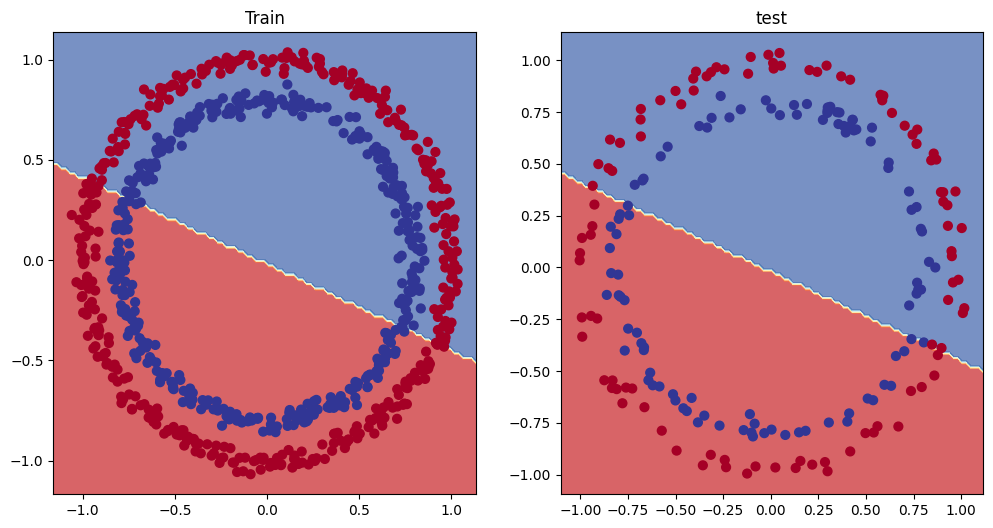

In [25]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,x_test, y_test)

In [26]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0796, -0.2678],
                      [ 0.4837, -0.4847],
                      [-0.3285, -0.1960],
                      [-0.4351,  0.0318],
                      [-0.6787,  0.6935]])),
             ('0.bias', tensor([-0.6069,  0.5210,  0.1150, -0.2191,  0.4239])),
             ('1.weight',
              tensor([[ 0.0331,  0.2036, -0.0446, -0.1426,  0.2221]])),
             ('1.bias', tensor([-0.2053]))])

In [27]:
class Circle_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        # z = self.layer1(x)
        # z = self.layer2(x)
        # z = self.layer3(x)
        return self.layer3(self.layer2(self.layer1(x)))

model_1 = Circle_model()

model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.2976,  0.6313],
                      [ 0.4087, -0.3091],
                      [ 0.4082,  0.1265],
                      [ 0.3591, -0.4310],
                      [-0.7000, -0.2732],
                      [-0.5424,  0.5802],
                      [ 0.2037,  0.2929],
                      [ 0.2236, -0.0123],
                      [ 0.5534, -0.5024],
                      [ 0.0445, -0.4826]])),
             ('layer1.bias',
              tensor([ 0.2180, -0.2435,  0.2167, -0.1473,  0.5865, -0.4191, -0.4217, -0.4217,
                       0.6360,  0.2356])),
             ('layer2.weight',
              tensor([[ 0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,  0.1132,  0.2628,
                       -0.1633, -0.2156],
                      [ 0.1678, -0.1278,  0.1919, -0.0750,  0.1809, -0.2457, -0.1596,  0.0964,
                        0.0669, -0.0806],
                      [ 0.1885,  0.2150, -0.2293, -0.1688,  0.2896, -0.1067

In [28]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr =0.1)

In [29]:
torch.manual_seed = 42
epochs = 1000

x_train,x_test,y_train,y_test = x_train.cpu(),x_test.cpu(),y_train.cpu(),y_test.cpu()

for epoch in range(epochs):
    model_1.train()

    y_logits = model_1(x_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, y_train)

    acc = accuracy(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)

        test_acc = accuracy(y_test, test_pred)

    if epoch%100 == 0:
        print(f"epoch:{epoch} | loss: {loss:.5f} | Acc: {acc:.2f}%")
        print(f"test_loss: {test_loss:.5f} | test_Acc: {test_acc:.2f}%")



epoch:0 | loss: 0.69713 | Acc: 50.00%
test_loss: 0.69594 | test_Acc: 50.00%
epoch:100 | loss: 0.69327 | Acc: 49.62%
test_loss: 0.69334 | test_Acc: 54.00%
epoch:200 | loss: 0.69311 | Acc: 49.88%
test_loss: 0.69357 | test_Acc: 50.00%
epoch:300 | loss: 0.69305 | Acc: 50.62%
test_loss: 0.69384 | test_Acc: 49.50%
epoch:400 | loss: 0.69301 | Acc: 50.50%
test_loss: 0.69407 | test_Acc: 46.00%
epoch:500 | loss: 0.69300 | Acc: 51.00%
test_loss: 0.69425 | test_Acc: 47.50%
epoch:600 | loss: 0.69299 | Acc: 51.50%
test_loss: 0.69438 | test_Acc: 47.00%
epoch:700 | loss: 0.69298 | Acc: 50.88%
test_loss: 0.69447 | test_Acc: 46.50%
epoch:800 | loss: 0.69298 | Acc: 51.00%
test_loss: 0.69453 | test_Acc: 46.00%
epoch:900 | loss: 0.69298 | Acc: 51.50%
test_loss: 0.69458 | test_Acc: 46.00%


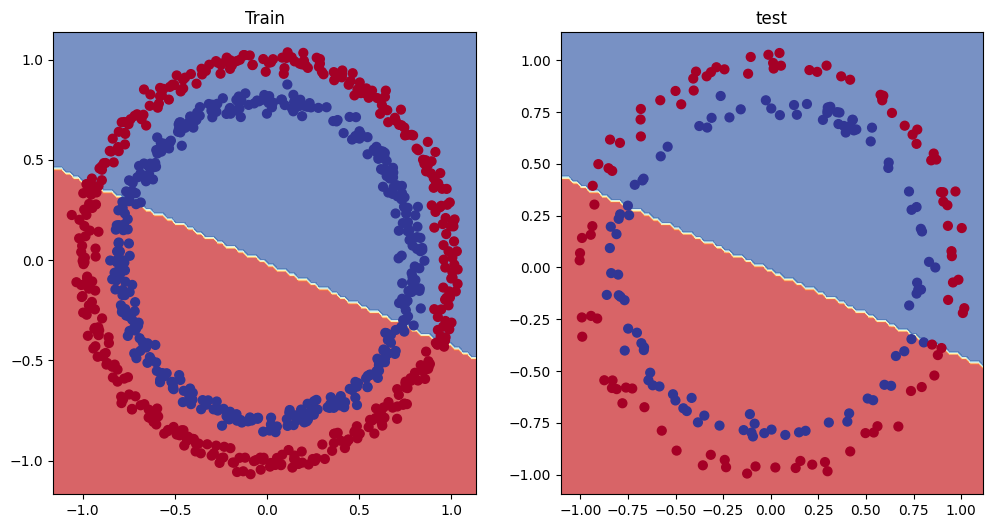

In [30]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,x_test, y_test)

In [31]:
w = 0.7
b = 0.3
X_regr = torch.arange(0,1,0.01).unsqueeze(dim=1)
y_regr = w*X_regr + b

X_regr[:10],y_regr[:10],len(X_regr),len(y_regr)

print(len(X_regr))

100


In [32]:
X_train = X_regr[:80]
y_train = y_regr[:80]
X_test,y_test = X_regr[80:],y_regr[80:]

In [33]:
len(X_train),len(y_test)

(80, 20)

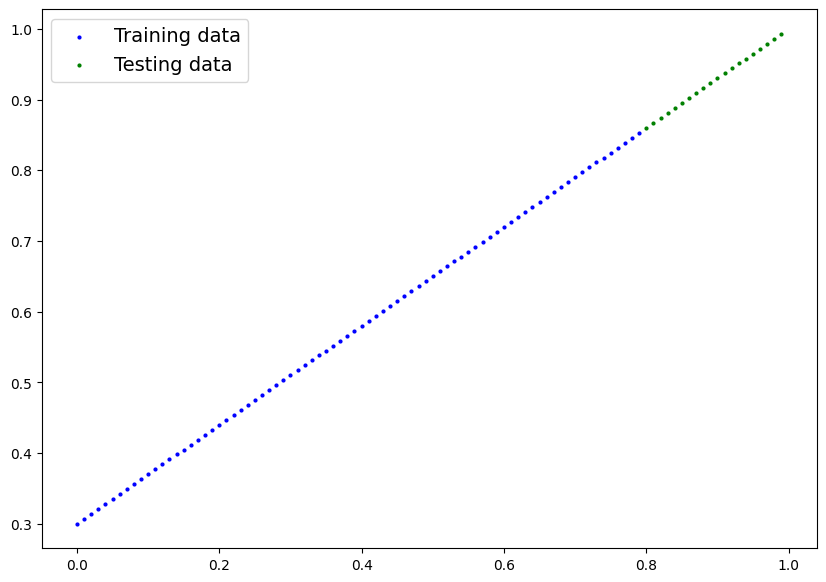

In [34]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None)

In [35]:
model_2 = nn.Sequential(
     nn.Linear(in_features=1, out_features=10),
     nn.Linear(in_features=10, out_features=10),
     nn.Linear(in_features=10, out_features=1)
)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr =0.01)

In [37]:
torch.manual_seed = 42

epochs = 1700


for epoch in range(epochs):
    model_1.train()
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    model_1.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch%100 == 0:
        print(f"epoch:{epoch} | loss: {loss:.5f} ")
        print(f"test_loss: {test_loss:.5f}")



epoch:0 | loss: 1.07564 
test_loss: 1.36347
epoch:100 | loss: 0.03665 
test_loss: 0.08681
epoch:200 | loss: 0.04046 
test_loss: 0.00373
epoch:300 | loss: 0.03583 
test_loss: 0.00387
epoch:400 | loss: 0.03161 
test_loss: 0.00421
epoch:500 | loss: 0.02912 
test_loss: 0.00635
epoch:600 | loss: 0.02667 
test_loss: 0.00584
epoch:700 | loss: 0.02475 
test_loss: 0.00644
epoch:800 | loss: 0.02613 
test_loss: 0.00592
epoch:900 | loss: 0.02553 
test_loss: 0.00592
epoch:1000 | loss: 0.02353 
test_loss: 0.00480
epoch:1100 | loss: 0.02416 
test_loss: 0.00523
epoch:1200 | loss: 0.02356 
test_loss: 0.00505
epoch:1300 | loss: 0.02392 
test_loss: 0.00575
epoch:1400 | loss: 0.02305 
test_loss: 0.00486
epoch:1500 | loss: 0.02143 
test_loss: 0.00532
epoch:1600 | loss: 0.02270 
test_loss: 0.00528


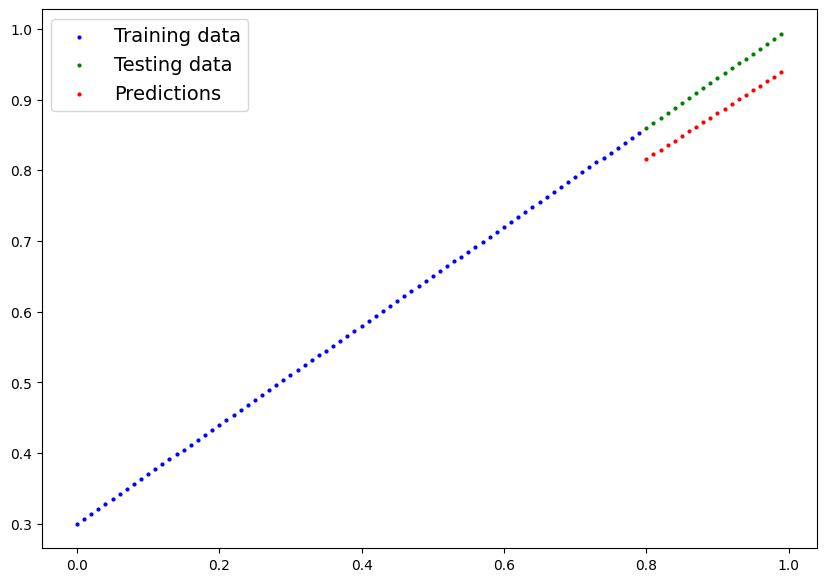

In [38]:
model_2.eval()
with torch.inference_mode():
    y_pred = model_2(X_test)

plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)


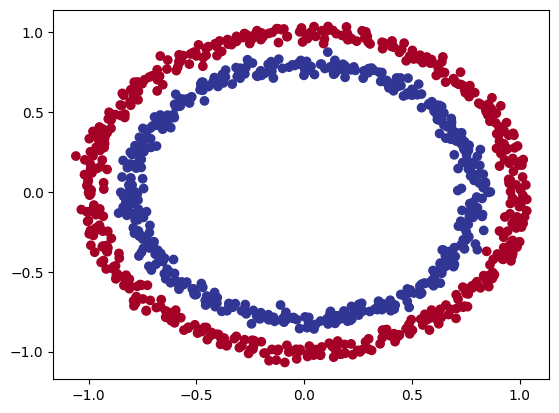

In [39]:
import matplotlib.pyplot as plt
from  sklearn.datasets import make_circles

n_samples = 1000


x,y = make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [40]:
import torch
from sklearn.model_selection import train_test_split


X = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [41]:
x_train[:5]

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])

In [42]:
from torch import nn

class CircleModelv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=10)
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelv2()
model_3

CircleModelv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [43]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [44]:
torch.manual_seed = 42

epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(x_train).squeeze()
    y_pred =  torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits,y_train)
    acc = accuracy(y_train,y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy(y_test,test_pred)

    if epoch%100 == 0:
        print(f"epoch:{epoch} | loss: {loss:.5f} | Acc: {acc:.2f}%")
        print(f"test_loss: {test_loss:.5f} | test_Acc: {test_acc:.2f}%")


epoch:0 | loss: 0.69865 | Acc: 50.00%
test_loss: 0.69794 | test_Acc: 50.00%
epoch:100 | loss: 0.69235 | Acc: 52.12%
test_loss: 0.69198 | test_Acc: 55.00%
epoch:200 | loss: 0.69113 | Acc: 61.62%
test_loss: 0.69085 | test_Acc: 61.00%
epoch:300 | loss: 0.68978 | Acc: 61.12%
test_loss: 0.68962 | test_Acc: 59.00%
epoch:400 | loss: 0.68790 | Acc: 61.00%
test_loss: 0.68789 | test_Acc: 60.00%
epoch:500 | loss: 0.68507 | Acc: 62.38%
test_loss: 0.68532 | test_Acc: 60.50%
epoch:600 | loss: 0.68054 | Acc: 64.62%
test_loss: 0.68137 | test_Acc: 61.50%
epoch:700 | loss: 0.67290 | Acc: 73.38%
test_loss: 0.67506 | test_Acc: 68.00%
epoch:800 | loss: 0.65907 | Acc: 87.12%
test_loss: 0.66399 | test_Acc: 82.50%
epoch:900 | loss: 0.63342 | Acc: 92.12%
test_loss: 0.64229 | test_Acc: 90.00%


In [45]:
import requests
from pathlib import Path


if Path("helper_functions.py").is_file():
    print("helper_function.py")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

helper_function.py


In [46]:
from helper_functions import plot_predictions,plot_decision_boundary

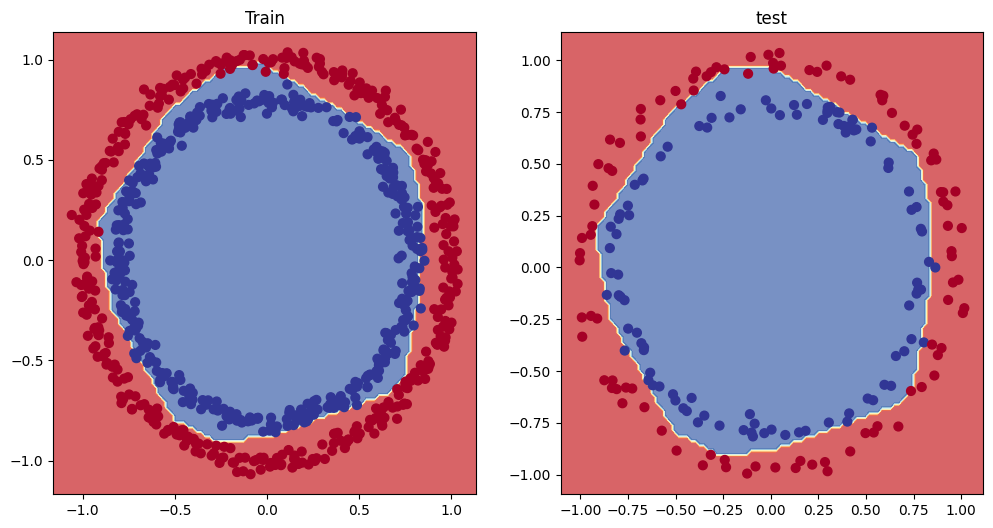

In [47]:
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,x_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,x_test, y_test)

In [48]:
model_3.eval()
with torch.inference_mode():
    y_pred = torch.round(torch.sigmoid(model_3(x_test)))

# plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred)
y_pred[:10],y_test[:10]

(tensor([[1.],
         [0.],
         [1.],
         [0.],
         [1.],
         [1.],
         [0.],
         [0.],
         [1.],
         [0.]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

# ***replicating non-linear activation***

In [49]:
A = torch.arange(-10,10,1 ,dtype=torch.float)
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

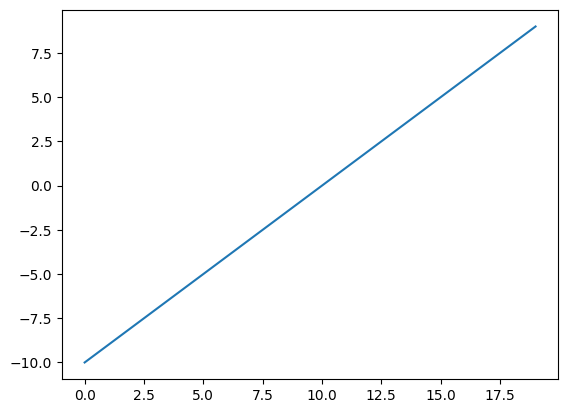

In [50]:
plt.plot(A)

In [51]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

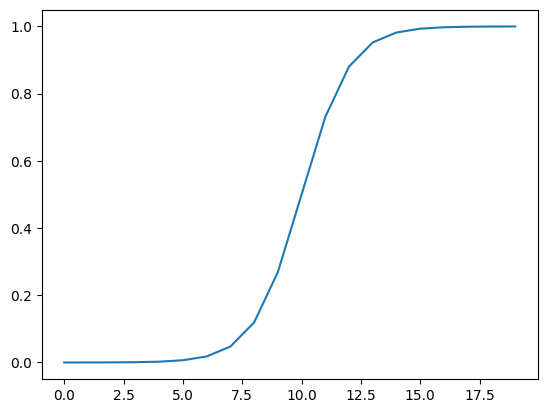

In [52]:
plt.plot(sigmoid(A))

# ***mutiple classification:***

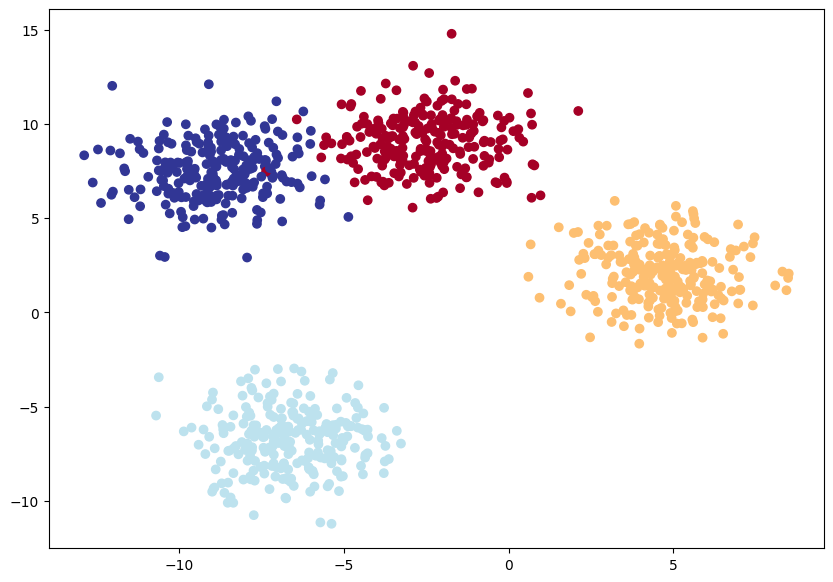

In [80]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASS = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

x_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASS,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED
                            )
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

x_train,x_test,y_train,y_test = train_test_split(x_blob,y_blob,test_size=0.2,random_state=RANDOM_SEED)

#ploting
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)


In [58]:
class BlobModel(nn.Module):
    def __init__(self,input_features,output_features,hidden_units=8):
        super().__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer(x)


model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)

model_4


BlobModel(
  (linear_layer): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [81]:
y_train[:5]

tensor([1, 0, 2, 2, 0])

In [82]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model_4.parameters(), lr=0.1)

In [70]:
# y_pred = torch.softmax(model_4(x_test)[:10], dim=1)
# y_logits = model_4(x_test)[:10]
# torch.sum(y_pred[0],y_logits[0])


In [76]:
print(f"y_logits data type: {y_logits.dtype}")
print(f"y_train data type: {y_train.dtype}")

y_logits data type: torch.float32
y_train data type: torch.float32


In [77]:
y_train = y_train.long()

In [83]:
torch.manual_seed = 42
epochs = 100

for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(x_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)

    acc = accuracy(y_train,y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(x_test)

        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy(y_test,test_pred)


    if epoch%10 == 0:
        print(f"epoch:{epoch} | loss: {loss:.5f} | Acc: {acc:.2f}%")
        print(f"test_loss: {test_loss:.5f} | test_Acc: {test_acc:.2f}%")

epoch:0 | loss: 1.14977 | Acc: 42.12%
test_loss: 1.04291 | test_Acc: 46.00%
epoch:10 | loss: 0.55803 | Acc: 98.25%
test_loss: 0.48542 | test_Acc: 99.00%
epoch:20 | loss: 0.19691 | Acc: 99.25%
test_loss: 0.16475 | test_Acc: 99.50%
epoch:30 | loss: 0.09896 | Acc: 99.38%
test_loss: 0.08224 | test_Acc: 99.50%
epoch:40 | loss: 0.06689 | Acc: 99.38%
test_loss: 0.05417 | test_Acc: 99.50%
epoch:50 | loss: 0.05233 | Acc: 99.38%
test_loss: 0.04110 | test_Acc: 99.50%
epoch:60 | loss: 0.04431 | Acc: 99.38%
test_loss: 0.03376 | test_Acc: 99.50%
epoch:70 | loss: 0.03934 | Acc: 99.38%
test_loss: 0.02914 | test_Acc: 99.50%
epoch:80 | loss: 0.03599 | Acc: 99.38%
test_loss: 0.02597 | test_Acc: 99.50%
epoch:90 | loss: 0.03359 | Acc: 99.38%
test_loss: 0.02371 | test_Acc: 99.50%


In [87]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(x_test)
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred[:5],y_test[:5]

(tensor([1, 3, 2, 1, 0]), tensor([1, 3, 2, 1, 0]))

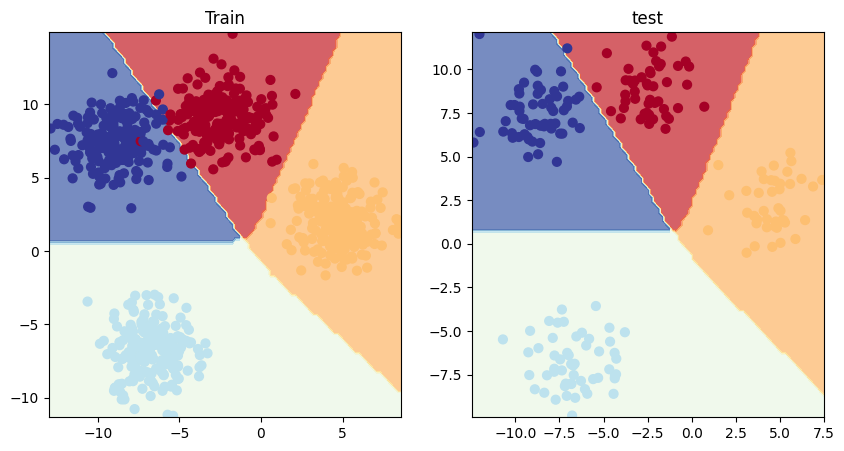

In [89]:
plt.figure(figsize =(10,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,x_train, y_train)

plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_4,x_test, y_test)

In [90]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 4.5 MB/s eta 0:00:00


In [92]:
from torchmetrics import Accuracy

tm_acc= Accuracy(task="multiclass",num_classes=4)

tm_acc(y_pred, y_test)

tensor(0.9950)